## Try prediciting a full-sized synthetic image

In [166]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing 

import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix

from sklearn.preprocessing import LabelEncoder

from IPython.display import clear_output
import matplotlib.pyplot as plt

from glob import glob
import os
import numpy as np
import cv2
from MightyMosaic import MightyMosaic

In [5]:
model = tf.keras.models.load_model('saved_model/model_1.3_50_epochs')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
model (Functional)              [(None, 64, 64, 96), 1841984     input_2[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, 8, 8, 512)    1476608     model[0][4]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 8, 8, 1088)   0           sequential[0][0]                 
                                                                 model[0][3]                

In [175]:
def load_data(path:
    images = sorted(glob(os.path.join(path, "*.png")))
    return images

def read_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    #image = cv2.resize(image, (128, 128))
    image = image / 255.0
    image = image.astype(np.float32)
    #image = np.expand_dims(image, axis=0)

    return image

In [176]:
path = "./full-size/synthetic/"

# File paths
images = load_data(path)
print(f"Images: {len(image_paths)}")

synthetic_images = [read_image(image) for image in images]
print(synthetic_images[0].shape)

Images: 6
(512, 512, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: _isclose_dispatcher() missing 1 required positional argument: 'b'

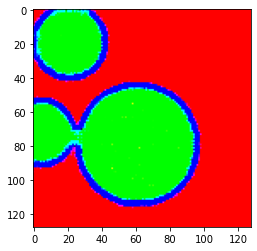

In [230]:
path = "./training_images/33_particles9.png"
image = read_image(path)
image = np.expand_dims(image, axis=0)

pred = model.predict(image)
plt.imshow(np.squeeze(pred))
print(np.unique())

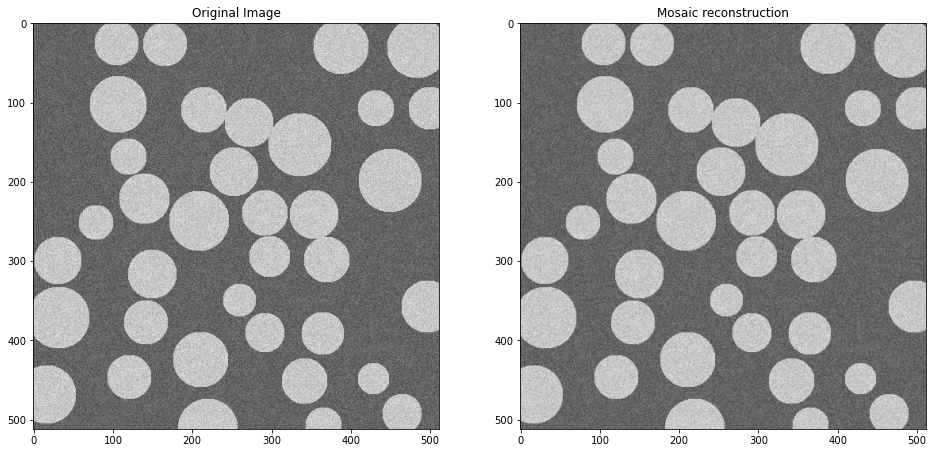

Mosaic shape: (8, 8, 128, 128, 3)


In [204]:
mosaic = MightyMosaic.from_array(synthetic_images[0], (128,128), overlap_factor=2)
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(synthetic_images[0])
plt.subplot(122)
plt.title("Mosaic reconstruction")
plt.imshow(mosaic.get_fusion(), interpolation='bilinear', vmin=0, vmax=1)
plt.show()
print("Mosaic shape: " + str(mosaic.shape))

In [203]:
prediction = mosaic.apply(model.predict, progress_bar=True)

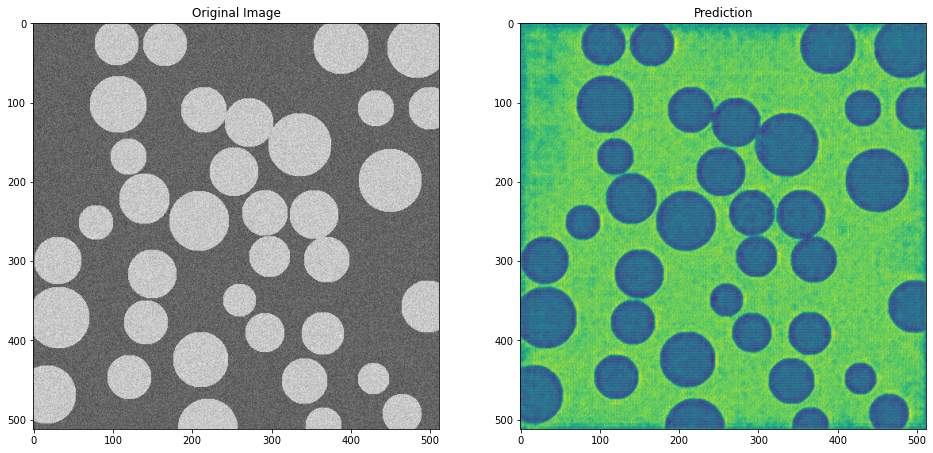

In [213]:
fused_prediction = prediction.get_fusion()

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(synthetic_images[0])

plt.subplot(122)
plt.title("Prediction")
plt.imshow(fused_prediction[:,:,0])#, interpolation='bilinear')
plt.show()

In [211]:
print(prediction)

[[[[[ 3.86944842e+00 -2.94881892e+00 -2.67743301e+00]
    [ 6.11477470e+00 -4.82420731e+00 -3.95761538e+00]
    [ 6.13003492e+00 -4.94803619e+00 -5.86369705e+00]
    ...
    [ 6.32754660e+00 -3.98100448e+00 -5.69298267e+00]
    [ 7.28559017e+00 -5.52337170e+00 -5.37304020e+00]
    [ 4.49112320e+00 -4.05315733e+00 -3.49506474e+00]]

   [[ 5.16453266e+00 -4.24939871e+00 -2.65548015e+00]
    [ 8.50508690e+00 -7.93770313e+00 -5.13217449e+00]
    [ 1.12789497e+01 -5.37903214e+00 -5.82291222e+00]
    ...
    [ 9.16307926e+00 -6.84701109e+00 -7.24400949e+00]
    [ 1.08676882e+01 -6.41105366e+00 -5.14615059e+00]
    [ 6.43467188e+00 -6.27248526e+00 -5.98469162e+00]]

   [[ 5.85245371e+00 -6.80595303e+00 -6.87917709e+00]
    [ 1.03962555e+01 -7.95912504e+00 -8.70747566e+00]
    [ 1.02953148e+01 -9.49889851e+00 -1.24424162e+01]
    ...
    [ 1.13323078e+01 -7.05294037e+00 -9.58750820e+00]
    [ 9.68348408e+00 -9.87014961e+00 -1.13163996e+01]
    [ 9.06224155e+00 -5.78976631e+00 -7.51359320e+00]]